# Arboles de decision y EDA


La clase pasada estuvimos viendo un poco de estadistica y EDA (exploratory data analysis), en este practico vamos a utilizar una herramienta que nos presenta la misma informacion de una forma mas amigable, y que requiere menos codigo

La primer mitad vamos a trabajar con el dataset de flores iris, y la segunda mitad es para que ustedes trabajen con el dataset breast-cancer-wisconsin.data

## Iris

Iris es un dataset clásico para quellos incursionando en el campo de Machine Learning, se trata de una coleccion de 150 flores que deben ser categorizadas en 3 clases (Setosa, Versicolor, Virginica). Esto debe realizarse a partir de medidas tomadas sobre cada flor.


Abajo comenzamos explorando el dataset y dejamos algunas tareas para que ustedes completen a medida que van avanzando. 



In [ ]:
# google colab
# !pip install matplotlib scikit-learn pandas
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# reseter kernel. van a Runtime > Restart Runtime

# local
# !pip install matplotlib scikit-learn pandas pandas-profiling


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Explorar el dataset
Para ello vamos a utilizar esta nueva herramienta que mencionamos, se llama `pandas-profiling`. Es parecido a `pandas.describe()` que vimos la clase pasada, pero nos da todavia mas informacion, y nos lo presenta de una manera mas linda.

Lo primero que vamos a tener que hacer es cargar el dataset en un dataframe

In [ ]:
#cargamos data al dataframe
df=pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
#le agregamos el target
df['target'] = iris_dataset['target']

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Si queremos podemos guardar el reporte como html

In [ ]:
profile.to_file("iris_dataset.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.09it/s]


### Plotting some features

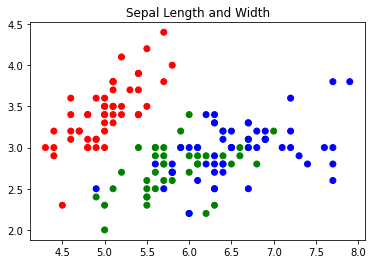

In [ ]:
colors = np.array(["r", "g", "b"])
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color=colors[df['target']])
plt.title("Sepal Length and Width")
plt.show()

## Ejercicio 1
Grafique el largo y ancho de los petalos 

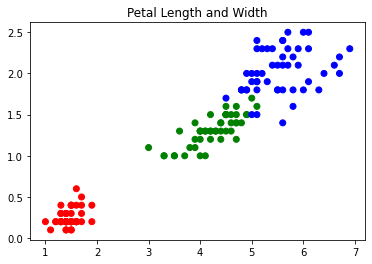

In [ ]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=colors[df['target']])
plt.title("Petal Length and Width")
plt.show()

TAREA 2
Qué puede observar en ambas graficas respecto a las tres clases? Qué conclusiones puede tomar?


El ancho y largo de los pétalos parece estar fuertísimamente relacionado con la clase de planta, a tal punto que incluso se podría construir un clasificador de muy buena precisión sobre cualquiera de estos dos atributos.
También podemos ver que el largo y ancho de pétalo tienen una correlación muy alta, casi trazando una recta al ser graficado. También es visible esta correlación en la matriz de correlación que muestra la herramienta de profiling.
El ancho y largo del tallo no parecen tener una relación tan interesante, ni entre ellos ni con la clase de planta.

# Clasificación

Para este problema de ejemplo vamos a entrenar un modelo sencillo basado en [Árboles de Decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Los árboles de decision son algoritmos de Machine Learning supervisado. Se construye un arbol binario (cada nodo tiene dos ramas). Los valores objetivos se presentan en las hojas de los arboles.

Pero antes de poder llegar a eso debemos dividir el dataset en conjuntos adecuados para **entrenar** y **testar** el modelo.


## Ejercicio 2
Por que debemos separar el set de datos? Es decir, por que no podemos validar el resultado con los mismos datos con los que entrenamos?

Porque, aunque entrenemos un algoritmo que es súper preciso sobre los datos de entrenamiento, no podríamos afirmar que es también preciso en datos fuera de este conjunto. Podría pasar que el algoritmo esté "memorizando" los datos de entrenamiento, y teniendo en la realidad una varianza enorme, y no nos enteraríamos.

## Split train-test
La clase pasada, vimos como separar los datos a mano, ahora vamos a ver una herramienta de sklearn que lo hace por nosotros

Usando sklearn separe el dataset (y los targets) iniciales en dos: un set de entremaniento y uno de test.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=(1.0/3), 
    random_state=42)

print(f'df shape = {df.shape}')
print(f'X_train shape = {X_train.shape}\n{X_train.head()}\n------------------------')
print(f'Y_train shape = {Y_train.shape}\n{Y_train.head()}\n------------------------')
print(f'X_test shape = {X_test.shape}\n{X_test.head()}\n------------------------')
print(f'Y_test shape = {Y_test.shape}\n{Y_test.head()}')

df shape = (150, 5)
X_train shape = (100, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
96                 5.7               2.9                4.2               1.3
105                7.6               3.0                6.6               2.1
66                 5.6               3.0                4.5               1.5
0                  5.1               3.5                1.4               0.2
122                7.7               2.8                6.7               2.0
------------------------
Y_train shape = (100,)
96     1
105    2
66     1
0      0
122    2
Name: target, dtype: int64
------------------------
X_test shape = (50, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78     

Una vez separados los datos podemos crear un modelo y entrenarlo, para ello necesitamos un objeto de la clase `DecisionTreeClassifier`.

Una vez creado llamamos al método `fit` con los datos de entrenamiento para entrenarlo y luego podemos usar los métodos predict para obtener predicciones de las clases para los datos de test.


### Ejercicio 3

Entrene un árbol de decisión de profundidad máxima 3 para clasificar los dato

Recuerden que pueden acceder a la documentacion [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


#Su código
arbol = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

Plotting the Decision Tree

[Text(372.0, 504.7714285714286, 'petal length (cm) <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(279.0, 427.11428571428576, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(465.0, 427.11428571428576, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(279.0, 349.4571428571429, 'petal length (cm) <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(186.0, 271.8, 'petal width (cm) <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]\nclass = versicolor'),
 Text(93.0, 194.14285714285717, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]\nclass = versicolor'),
 Text(279.0, 194.14285714285717, 'sepal width (cm) <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]\nclass = versicolor'),
 Text(186.0, 116.48571428571432, 'sepal length (cm) <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(93.0, 3

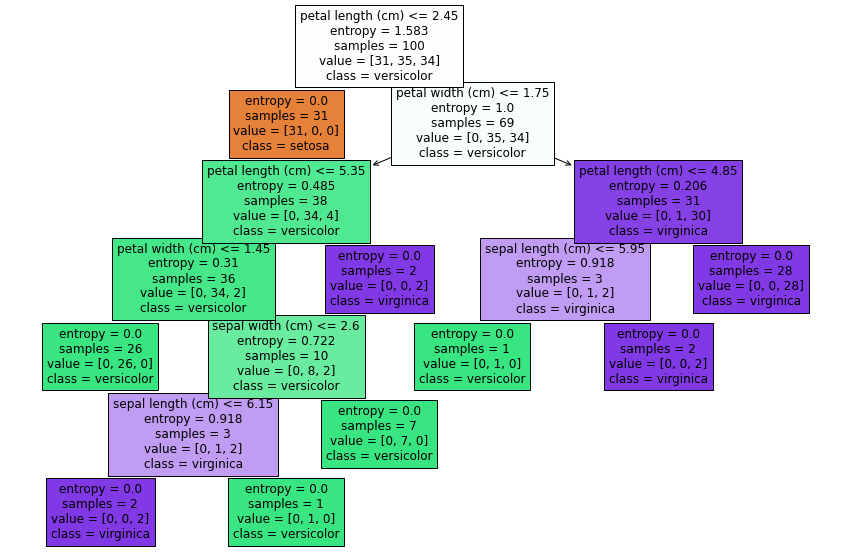

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(arbol, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)

In [ ]:
# fig.savefig("decistion_tree.png")


### Ejercicio 4
Hacer una funcion que mida la accuracy de su modelo, luego compare el resultado con lo mismo calculado por sklearn 

Accuracy: que porcentaje de los datos de test fueron clasificados correctamente?


def calculate_accuracy(un_arbol, X_test, Y_test):
    pass

In [ ]:
Y_pred = arbol.predict(X_test)

# Técnica A
#Su código
print("Técnica A:", (Y_pred == Y_test).sum() / len(Y_pred))

#Técnica B
from sklearn.metrics import accuracy_score
Y_pred = arbol.predict(X_test)
print("Técnica B:", accuracy_score(Y_pred, Y_test))

Técnica A: 0.98
Técnica B: 0.98


### Ejercicio 5

Armar un arbol de altura maxima 2, cual de los dos es mejor?

Los dos logran obtener una accuracy casi perfecta en el conjunto de test, por lo que se podría decir que ambos son "igual de buenos". Sin embargo también se podría que argumentar que al ser iguales las precisiones el modelo de menor capacidad, es decir el de profundidad máxima 2, es mejor, ya que es menos probable que esté overfitteando a los datos de entrenamiento y encontrando un punto de corte más robusto entre los datos.

In [ ]:
arbol2 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred1 = arbol.predict(X_test)
y_pred2 = arbol2.predict(X_test)
print("Confusion Matrix Arbol 1")       
print(confusion_matrix(Y_test, y_pred1))
print("Confusion Matrix Arbol 2")       
print(confusion_matrix(Y_test, y_pred2))
print("Classification report Arbol 1")
print(classification_report(Y_test, y_pred1, target_names = iris_dataset["target_names"]))
print(classification_report(Y_test, y_pred2, target_names = iris_dataset["target_names"]))

Confusion Matrix Arbol 1
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Confusion Matrix Arbol 2
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Classification report Arbol 1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Tambien podemos imprimir la matriz de confucion mas linda, haciendo un plot

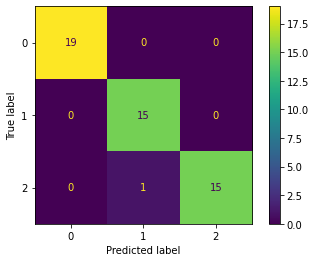

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbol, X_test, Y_test) 

# Breast Cancer Wisconsin

El dataset de Iris es muy sencillo y muy fácilmente podemos obtener 100% de precisión con un modelo simple. La tarea siguiente implica el uso de un dataset real para el cual van a tener que entrenar un Árbol de decisión para detectar cancer de mama a partir de distintas mediciones. 

La descripción del dataset la pueden encontrar aquí: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Carguen el nuevo df

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
breast_cancer_df = df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML ORT/Practico 2/breast-cancer-wisconsin.csv")

Mounted at /content/drive


Si hacemos `breast_cancer_df.head()` podemos ver que las columnas no tienen nombre

In [ ]:
breast_cancer_df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Le podemos agregar el nombre a las columnas

In [ ]:
breast_cancer_df.columns = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
breast_cancer_df.head()

,Id,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
# En el dataset las clases son 2 y 4 que representan Benigno y Maligno, vamos a reemplazarlas por 0 y 1 por simplicidad.
breast_cancer_df["target"].replace(2, 0, inplace=True)
breast_cancer_df["target"].replace(4, 1, inplace=True)

# Opcion A) Eliminamos la columna de ID ya que no nos interesa
breast_cancer_df.drop(columns="Id", inplace=True)

# Opcion B) Hacemos que el ID sea el Index
#breast_cancer_df.set_index("Id", inplace = True)
breast_cancer_df.head()


,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [ ]:
# Finalmente, contamos cuantos ejemplos son beningnos y cuantos no (0 = B, 1 = M)
breast_cancer_df["target"].value_counts()

0    457
1    241
Name: target, dtype: int64

In [ ]:
breast_cancer_df["nuclei"].value_counts()

1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [ ]:
breast_cancer_df[breast_cancer_df["nuclei"]=='?']

,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
22,8,4,5,1,2,?,7,3,1,1
39,6,6,6,9,6,?,7,8,1,0
138,1,1,1,1,1,?,2,1,1,0
144,1,1,3,1,2,?,2,1,1,0
157,1,1,2,1,3,?,1,1,1,0
163,5,1,1,1,2,?,3,1,1,0
234,3,1,4,1,2,?,3,1,1,0
248,3,1,1,1,2,?,3,1,1,0
274,3,1,3,1,2,?,2,1,1,0
291,8,8,8,1,2,?,6,10,1,1


In [ ]:
#Drop observations which have '?' value in Nuclei quantity
breast_cancer_df.drop(breast_cancer_df[breast_cancer_df["nuclei"]=='?'].index, inplace = True)


### Ejercicio 6

Realice una exploracion del dataset como hicimos para el caso de Iris, tome en cuenta que en este caso tenemos 9 features en lugar de 4.

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(breast_cancer_df)

profile

### Ejercicio 7

Entrene al menos 2 arboles de Decisión para este set de datos, como hicimos anteriormente, recuerde separar los datos en conjuntos de entrenamiento y test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    breast_cancer_df.drop(columns=['target']),
    breast_cancer_df['target'],
    test_size=0.2,
    stratify=breast_cancer_df['target']
)
print(len(x_train), len(x_test), x_train.columns)
print(y_train.value_counts(), y_test.value_counts())

545 137 Index(['clump_thicknes', 'cell_size', 'cell_shape', 'adhesion',
       'epithelial_cell_size', 'nuclei', 'chromatin', 'nucleoli', 'mitoses'],
      dtype='object')
0    354
1    191
Name: target, dtype: int64 0    89
1    48
Name: target, dtype: int64


In [ ]:
tree1 = DecisionTreeClassifier().fit(x_train, y_train)
print("Tree 1 train acc:", accuracy_score(tree1.predict(x_train), y_train))
print("Tree 1 test acc:", accuracy_score(tree1.predict(x_test), y_test))

Tree 1 train acc: 1.0
Tree 1 test acc: 0.9124087591240876


In [ ]:
tree2 = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
print("Tree 1 train acc:", accuracy_score(tree2.predict(x_train), y_train))
print("Tree 1 test acc:", accuracy_score(tree2.predict(x_test), y_test))

Tree 1 train acc: 0.9541284403669725
Tree 1 test acc: 0.9416058394160584


In [ ]:
tree3 = DecisionTreeClassifier(min_samples_leaf=40).fit(x_train, y_train)
print("Tree 1 train acc:", accuracy_score(tree3.predict(x_train), y_train))
print("Tree 1 test acc:", accuracy_score(tree3.predict(x_test), y_test))

Tree 1 train acc: 0.9412844036697248
Tree 1 test acc: 0.9416058394160584


### Ejercicio 8
Cual de los arboles es el mejor?
Imprima la matriz de confucion del mejor modelo

Tanto el modelo con profundidad máxima restringida como el modelo con número mínimo de ejemplos por hoja restringido obtuvieron una mejor precisión que el primero, el cual overfiteó totalmente a los datos de train obteniendo un peor resultado sobre el conjunto de test.

In [ ]:
y_test

391    0
290    0
3      0
379    0
167    0
      ..
635    1
573    1
162    0
534    0
208    0
Name: target, Length: 137, dtype: int64

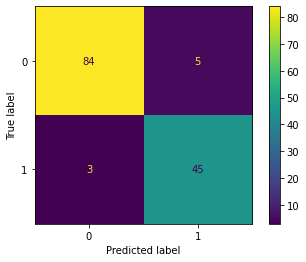

In [ ]:
plot_confusion_matrix(tree2, x_test, y_test) 